# Joe Stanley
### HWK3 - ECE523

In [14]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import electricpy as ep
from electricpy import fault as flt
from electricpy.constants import *

## Problem 1:
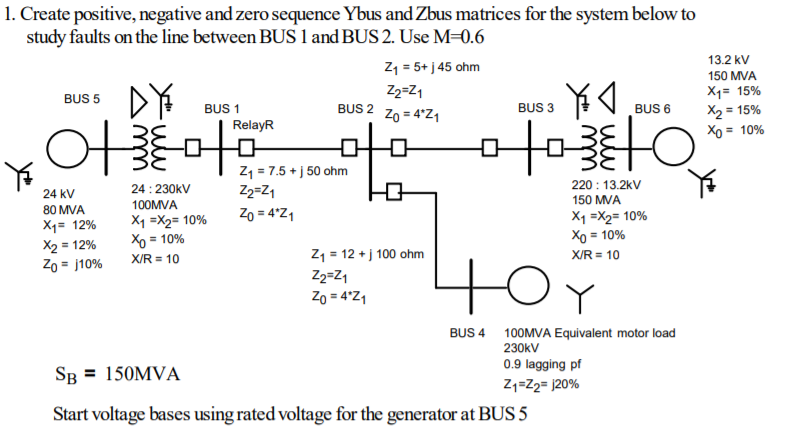

In [2]:
# Define Per-Unit Bases
Sbase = 150*M
Vbase5 = 24*k
Vbase1234 = 230*k
Vbase6 = Vbase1234 *13.2/220
Zbase1234 = ep.zpu(Sbase,Vbase1234)

# Evaluate Per-Unit Line Impedances
Z12_1 = (7.5 + 50j)/Zbase1234
Z12_0 = 4*Z12_1
Z23_1 = (5 + 45j)  /Zbase1234
Z23_0 = 4*Z23_1
Z24_1 = (12 + 100j)/Zbase1234
Z24_0 = 4*Z24_1
print("Z12:",np.around(Z12_1,3),
      "\nZ23:",np.round(Z23_1,3),
      "\nZ24:",np.round(Z24_1,3))

# Define System Terms
percent = 1/100
g5_x1 = 12j*percent
g5_x2 = g5_x1
g5_x0 = 10j*percent
t15_1 = ep.puchgbase(ep.rxrecompose(10*percent,10),ep.zpu(100*M,230*k),Zbase1234)
t15_2 = t15_1
t15_0 = t15_1
g6_x1 = 15j*percent
g6_x2 = g6_x1
g6_x0 = 10j*percent
t36_1 = ep.puchgbase(ep.rxrecompose(10*percent,10),ep.zpu(150*M,220*k),Zbase1234)
t36_2 = t36_1
t36_0 = t36_1
m4_x1 = 20j*percent
m4_x2 = m4_x1

# Since we're considering a fault at location M, we must create a
# ficticious bus for the location M. Let's Define two "new lines"
Mdist = 0.6
Z1M_1 = Z12_1 * Mdist
Z1M_0 = Z12_0 * Mdist
ZM2_1 = Z12_1 * (1-Mdist)
ZM2_0 = Z12_0 * (1-Mdist)

# Define the Positive-Sequence Y-Bus Matrix, Will be 7x7 (include M bus)
ybus1 = np.array([
    [1/(t15_1)+1/(Z1M_1),  0,  0,  0,  -en30/(t15_1),  0,  -1/(Z1M_1)],
    [0,  1/(ZM2_1)+1/(Z23_1)+1/(Z24_1),  -1/(Z23_1), -1/(Z24_1),  0,  0,  -1/(ZM2_1)],
    [0,  -1/(Z23_1),  1/(Z23_1)+1/(t36_1),  0,  0,  -en30/(t36_1),  0],
    [0,  -1/(Z24_1),  0,  1/(Z24_1)+1/(m4_x1),  0,  0,  0],
    [-e30/(t15_1),  0,  0,  0,  1/(t15_1)+1/(g5_x1),  0,  0],
    [0,  0,  -e30/(t36_1),  0,  0,  1/(t36_1)+1/(g6_x1),  0],
    [-1/(Z1M_1),  -1/(ZM2_1),  0,  0,  0,  0,  1/(Z1M_1)+1/(ZM2_1)]
])
zbus1 = np.linalg.inv(ybus1)
LATEXybus1 = ep.clatex(ybus1,round=1,polar=False,double=True)
LATEXzbus1 = ep.clatex(zbus1,polar=False,double=True)

# Define the Negative-Sequence Y-Bus Matrix
ybus2 = np.array([
    [1/(t15_2)+1/(Z1M_1),  0,  0,  0,  -e30/(t15_2),  0,  -1/(Z1M_1)],
    [0,  1/(ZM2_1)+1/(Z23_1)+1/(Z24_1),  -1/(Z23_1), -1/(Z24_1),  0,  0,  -1/(ZM2_1)],
    [0,  -1/(Z23_1),  1/(Z23_1)+1/(t36_2),  0,  0,  -e30/(t36_2),  0],
    [0,  -1/(Z24_1),  0,  1/(Z24_1)+1/(m4_x2),  0,  0,  0],
    [-en30/(t15_2),  0,  0,  0,  1/(t15_2)+1/(g5_x2),  0,  0],
    [0,  0,  -en30/(t36_2),  0,  0,  1/(t36_2)+1/(g6_x2),  0],
    [-1/(Z1M_1),  -1/(ZM2_1),  0,  0,  0,  0,  1/(Z1M_1)+1/(ZM2_1)]
])
zbus2 = np.linalg.inv(ybus2)
LATEXybus2 = ep.clatex(ybus2,round=1,polar=False,double=True)
LATEXzbus2 = ep.clatex(zbus2,polar=False,double=True)

# Define the Zero-Sequence Y-Bus Matrix
ybus0 = np.array([
    [1/(t15_0)+1/(Z1M_0),  0,  0,  0,  0,  0,  -1/(Z1M_0)],
    [0,  1/(ZM2_0)+1/(Z23_0)+1/(Z24_0),  -1/(Z23_0), -1/(Z24_0),  0,  0,  -1/(ZM2_0)],
    [0,  -1/(Z23_0),  1/(Z23_0)+1/(t36_0),  0,  0,  0,  0],
    [0,  -1/(Z24_0),  0,  1/(Z24_0),  0,  0,  0],
    [0,  0,  0,  0,  1/(t15_0)+1/(g5_x0),  0,  0],
    [0,  0,  0,  0,  0,  1/(t36_0)+1/(g6_x0),  0],
    [-1/(Z1M_0),  -1/(ZM2_0),  0,  0,  0,  0,  1/(Z1M_0)+1/(ZM2_0)]
])
zbus0 = np.linalg.inv(ybus0)
LATEXybus0 = ep.clatex(ybus0,round=1,polar=False,double=True)
LATEXzbus0 = ep.clatex(zbus0,polar=False,double=True)

Z12: (0.021+0.142j) 
Z23: (0.014+0.128j) 
Z24: (0.034+0.284j)


### Positive Sequence:
**Y-Bus Matrix:**
{{LATEXybus1}}

**Z-Bus Matrix:**
{{LATEXzbus1}}

---

### Negative Sequence:
**Y-Bus Matrix:**
{{LATEXybus2}}

**Z-Bus Matrix:**
{{LATEXzbus2}}

---

### Zero Sequence:
**Y-Bus Matrix:**
{{LATEXybus0}}

**Z-Bus Matrix:**
{{LATEXzbus0}}

## Problem 2:
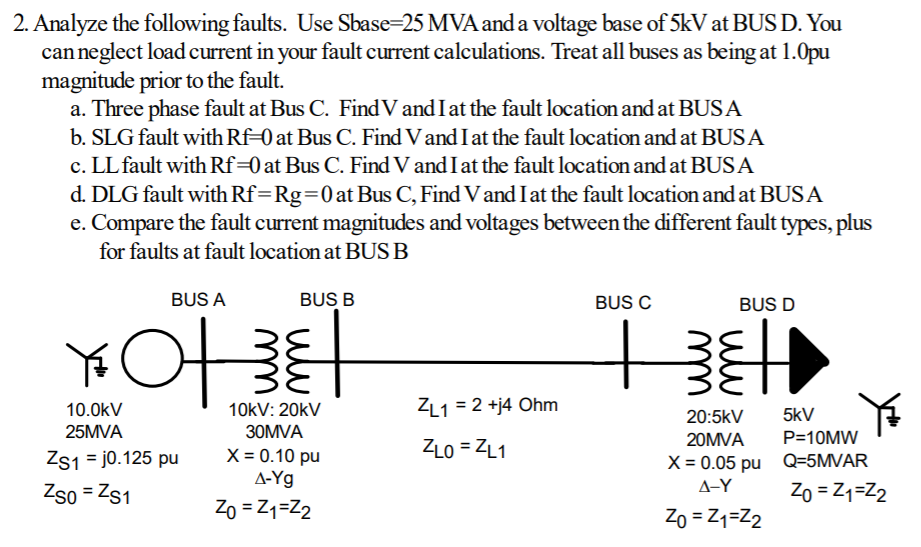

In [19]:
# Define Per-Unit Bases
Sbase = 25*M
VbaseD = 5*k
VbaseBC = 20*k
VbaseA = 10*k
ZbaseBC = ep.zpu(Sbase,VbaseBC)

# Evaluate Load Impedance
Sload = 10*M + 5j*M
Zload = ep.powerimpedance(Sload,VbaseD)
print("Load Impedance:",np.around(Zload,3))

# Set Impedances in Appropriate Base
Zsrc = 0.125j
tab_1 = ep.puchgbase(0.10j,ep.zpu(30*M,20*k),ZbaseBC)
tcd_1 = ep.puchgbase(0.05j,ep.zpu(20*M,20*k),ZbaseBC)
Zline = (2+4j) / ZbaseBC
print("Transformer 1:",tab_1,
      "\nTransformer 2:",tcd_1,
      "\nZline:",Zline)

# Evaluate the Z-Bus Matricies
zbus1 = np.linalg.inv(np.array([
    [1/Zsrc+1/tab_1,  -e30/tab_1,  0,  0],
    [-en30/tab_1,  1/tab_1+1/Zline,  -1/Zline,  0],
    [0,  -1/Zline,  1/Zline+1/tcd_1,  -e30/tcd_1],
    [0,  0, -en30/tcd_1,  1/tcd_1+1/Zload]
]))
zbus2 = np.linalg.inv(np.array([
    [1/Zsrc+1/tab_1,  -en30/tab_1,  0,  0],
    [-e30/tab_1,  1/tab_1+1/Zline,  -1/Zline,  0],
    [0,  -1/Zline,  1/Zline+1/tcd_1,  -en30/tcd_1],
    [0,  0, -e30/tcd_1,  1/tcd_1+1/Zload]
]))
zbus0 = np.linalg.inv(np.array([
    [1/Zsrc,  0,  0,  0],
    [0,  1/tab_1+1/Zline,  -1/Zline,  0],
    [0,  -1/Zline,  1/Zline+1/tcd_1,  0],
    [0,  0, 0,  1/Zload]
]))
print("\nPositive Sequence Z-Bus:")
print(tabulate(np.asarray(np.around(zbus1,3),dtype=str),tablefmt="fancy_grid"))
print("\nNegative Sequence Z-Bus:")
print(tabulate(np.asarray(np.around(zbus2,3),dtype=str),tablefmt="fancy_grid"))
print("\nZero Sequence Z-Bus:")
print(tabulate(np.asarray(np.around(zbus0,3),dtype=str),tablefmt="fancy_grid"))

# Evaluate The Thevenin Set For Fault Calculations
Zth = [zbus0[3,3],zbus1[3,3],zbus2[3,3]]

# A) Three-Phase
I012 = flt.phs3(1,Zth)
VA = flt.busvolt(1,3,1,zbus0,zbus1,zbus2,I012,sequence=False)
VC = flt.busvolt(3,3,1,zbus0,zbus1,zbus2,I012,sequence=False)
print("\nThree-Phase Fault")
ep.cprint(ep.seq_to_phs(I012),"A",label=["IA","IB","IC"])
ep.cprint(VA,"V",["A-VA","A-VB","A-VC"])
ep.cprint(VC,"V",["C-VA","C-VB","C-VC"])

# B) SLG Fault:
I012 = flt.phs1g(1,Zth)
VA = flt.busvolt(1,3,1,zbus0,zbus1,zbus2,I012,sequence=False)
VC = flt.busvolt(3,3,1,zbus0,zbus1,zbus2,I012,sequence=False)
print("\nSingle-Line-to-Ground Fault")
ep.cprint(ep.seq_to_phs(I012),"A",label=["IA","IB","IC"])
ep.cprint(VA,"V",["A-VA","A-VB","A-VC"])
ep.cprint(VC,"V",["C-VA","C-VB","C-VC"])

# C) LL Fault:
I012 = flt.phs2(1,Zth)
VA = flt.busvolt(1,3,1,zbus0,zbus1,zbus2,I012,sequence=False)
VC = flt.busvolt(3,3,1,zbus0,zbus1,zbus2,I012,sequence=False)
print("\nLine-to-Line Fault")
ep.cprint(ep.seq_to_phs(I012),"A",label=["IA","IB","IC"])
ep.cprint(VA,"V",["A-VA","A-VB","A-VC"])
ep.cprint(VC,"V",["C-VA","C-VB","C-VC"])

# D) DLG Fault:
I012 = flt.phs2g(1,Zth)
VA = flt.busvolt(1,3,1,zbus0,zbus1,zbus2,I012,sequence=False)
VC = flt.busvolt(3,3,1,zbus0,zbus1,zbus2,I012,sequence=False)
print("\nDouble-Line-to-Ground Fault")
ep.cprint(ep.seq_to_phs(I012),"A",label=["IA","IB","IC"])
ep.cprint(VA,"V",["A-VA","A-VB","A-VC"])
ep.cprint(VC,"V",["C-VA","C-VB","C-VC"])

Load Impedance: (2.5+5j)
Transformer 1: 0.08333333333333334j 
Transformer 2: 0.0625j 
Zline: (0.125+0.25j)

Positive Sequence Z-Bus:
╒════════════════╤═════════════════╤═════════════════╤═════════════════╕
│ (0.001+0.123j) │ (-0.059+0.106j) │ (-0.056+0.101j) │ (-0.098+0.059j) │
├────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ (0.062+0.104j) │ (0.003+0.202j)  │ (0.003+0.192j)  │ (-0.092+0.167j) │
├────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ (0.059+0.099j) │ (0.003+0.192j)  │ (0.122+0.422j)  │ (-0.102+0.422j) │
├────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ (0.1+0.055j)   │ (0.099+0.163j)  │ (0.315+0.3j)    │ (0.124+0.474j)  │
╘════════════════╧═════════════════╧═════════════════╧═════════════════╛

Negative Sequence Z-Bus:
╒═════════════════╤═════════════════╤═════════════════╤════════════════╕
│ (0.001+0.123j)  │ (0.062+0.104j)  │ (0.059+0.099j)  │ (0.1+0.055j)   │
├─────────────────┼─────────────────┼─

## Problem 3:
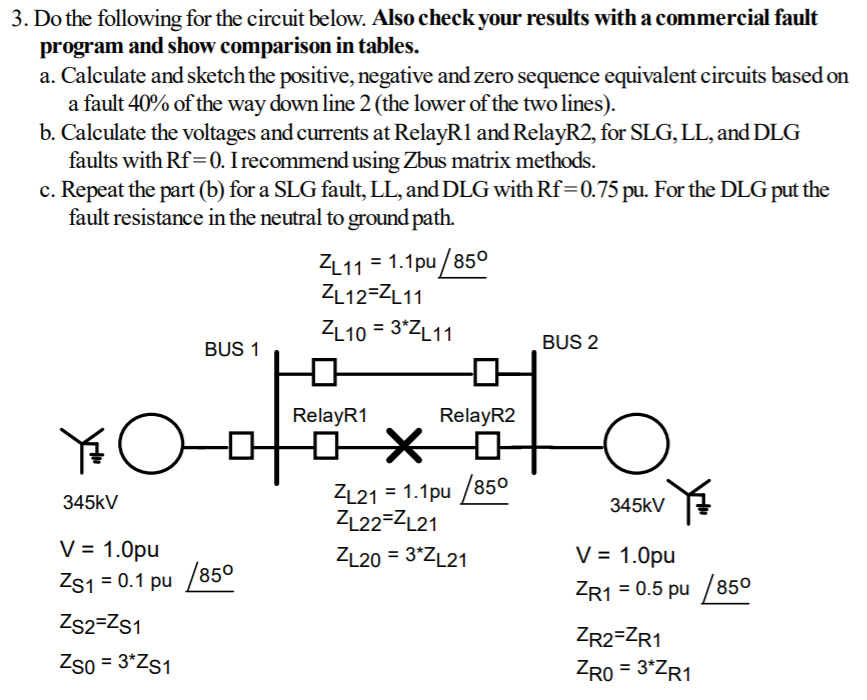

In [20]:
# Define Impedances
zs1 = ep.phasor(0.1,85)
zl1 = ep.phasor(1.1,85)
zl13 = ep.phasor(1.1,85)*0.4
zl32 = ep.phasor(1.1,85)*0.6
zr1 = ep.phasor(0.5,85)

# Generate Sequence Impedance Busses
zbus1 = np.linalg.inv(np.array([
    [1/zs1+1/zl1+1/zl13,  -1/zl1,  -1/zl13],
    [-1/zl1,  1/zl1+1/zl32+1/zr1,  -1/zl32],
    [-1/zl13,  -1/zl32,  1/zl13+1/zl32]
]))
zbus2 = zbus1
zbus0 = np.linalg.inv(np.array([
    [1/(zs1*3)+1/(zl1*3)+1/(zl13*3),  -1/(zl1*3),  -1/(zl13*3)],
    [-1/(zl1*3),  1/(zl1*3)+1/(zl32*3)+1/(zr1*3),  -1/(zl32*3)],
    [-1/(zl13*3),  -1/(zl32*3),  1/(zl13*3)+1/(zl32*3)]
]))
print("\nPositive Sequence Z-Bus:")
print(tabulate(np.asarray(np.around(zbus1,3),dtype=str),tablefmt="fancy_grid"))
print("\nNegative Sequence Z-Bus:")
print(tabulate(np.asarray(np.around(zbus2,3),dtype=str),tablefmt="fancy_grid"))
print("\nZero Sequence Z-Bus:")
print(tabulate(np.asarray(np.around(zbus0,3),dtype=str),tablefmt="fancy_grid"))


Positive Sequence Z-Bus:
╒════════════════╤════════════════╤════════════════╕
│ (0.008+0.091j) │ (0.004+0.043j) │ (0.006+0.072j) │
├────────────────┼────────────────┼────────────────┤
│ (0.004+0.043j) │ (0.025+0.282j) │ (0.012+0.139j) │
├────────────────┼────────────────┼────────────────┤
│ (0.006+0.072j) │ (0.012+0.139j) │ (0.032+0.362j) │
╘════════════════╧════════════════╧════════════════╛

Negative Sequence Z-Bus:
╒════════════════╤════════════════╤════════════════╕
│ (0.008+0.091j) │ (0.004+0.043j) │ (0.006+0.072j) │
├────────────────┼────────────────┼────────────────┤
│ (0.004+0.043j) │ (0.025+0.282j) │ (0.012+0.139j) │
├────────────────┼────────────────┼────────────────┤
│ (0.006+0.072j) │ (0.012+0.139j) │ (0.032+0.362j) │
╘════════════════╧════════════════╧════════════════╛

Zero Sequence Z-Bus:
╒════════════════╤════════════════╤════════════════╕
│ (0.024+0.273j) │ (0.011+0.13j)  │ (0.019+0.216j) │
├────────────────┼────────────────┼────────────────┤
│ (0.011+0.13j)  │ (0.074